Step 1: Load and Understand the Data


In [29]:
# -*- coding: utf-8 -*-
"""
Sleep Health and Lifestyle Prediction:
An End-to-End Analysis and Machine Learning Workflow
"""

# --- Step 1: Data Loading and Initial Exploration ---

# Importing necessary libraries for data loading
import pandas as pd
import numpy as np # Used for numerical operations later, good to import early

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Make sure the 'Sleep_health_and_lifestyle_dataset.csv' file is uploaded to your Colab environment
file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please upload it to your Colab environment.")
    # In a real notebook, you might want to stop execution or provide instructions here.
    # For a runnable script, we'll just exit.
    exit()

# Display the first few rows of the dataset
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\n--- Dataset Information ---")
df.info()

# Generate descriptive statistics of the numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for duplicate rows
print("\n--- Duplicate Rows Check ---")
if df.duplicated().any():
    print(f"Found {df.duplicated().sum()} duplicate rows. It's recommended to handle them if necessary.")
    # Example to drop duplicates: df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")

# Note on 'Sleep Disorder' missing values: df.info() will show NaNs.
# We will fill these in the EDA section for consistent analysis.

Dataset loaded successfully.

--- First 5 Rows of the Dataset ---
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          7


--- Exploratory Data Analysis (EDA) ---
Missing values in 'Sleep Disorder' filled with 'None' for EDA purposes.

Distribution of 'Sleep Disorder':
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


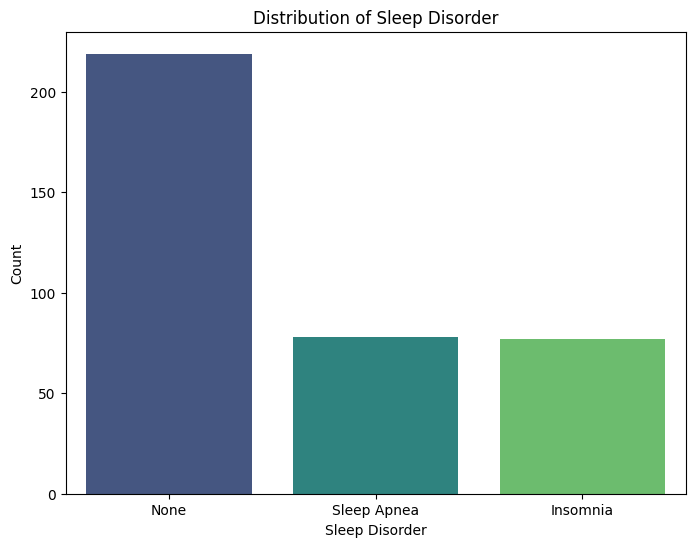

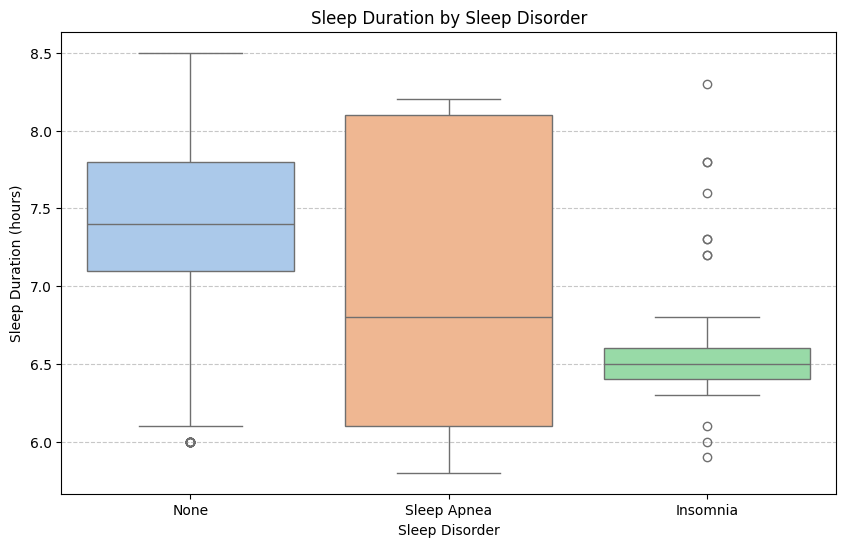

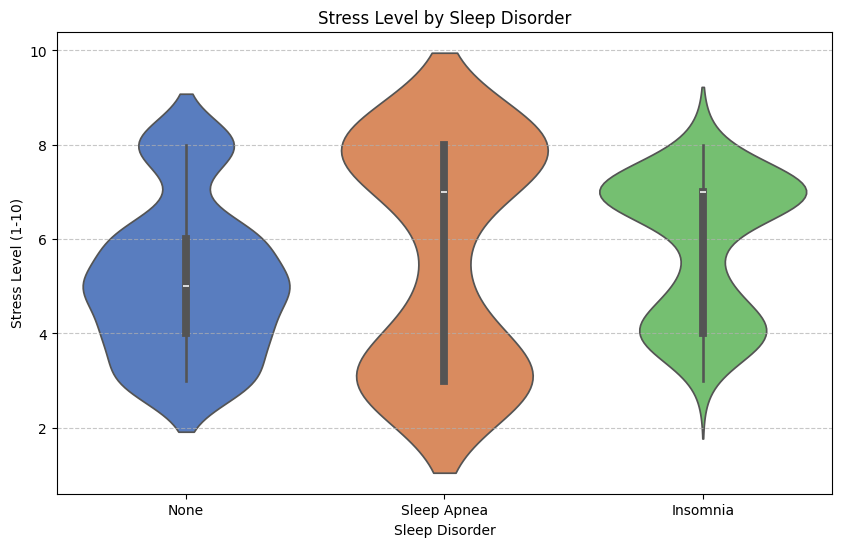

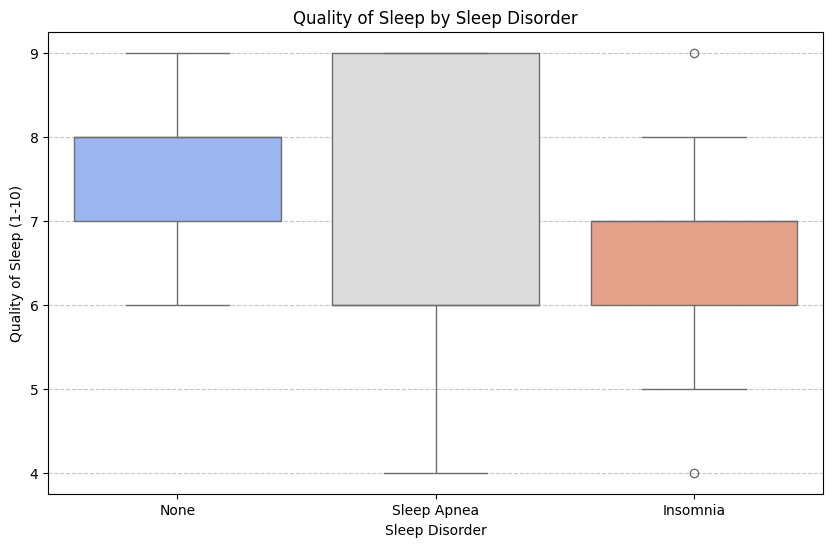

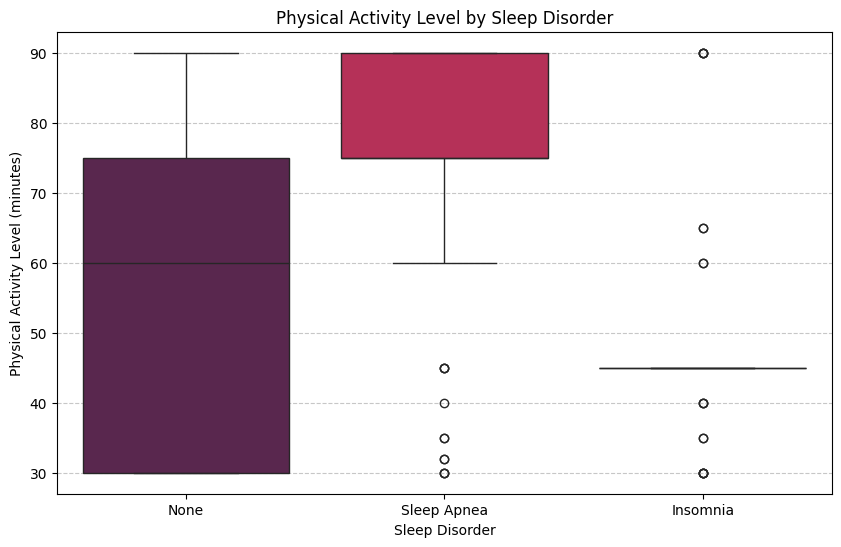


--- Mean Values by Sleep Disorder Category ---
                Sleep Duration  Stress Level  Quality of Sleep  \
Sleep Disorder                                                   
Insomnia              6.589610      5.870130          6.532468   
None                  7.358447      5.114155          7.625571   
Sleep Apnea           7.032051      5.666667          7.205128   

                Physical Activity Level        Age  
Sleep Disorder                                      
Insomnia                      46.818182  43.519481  
None                          57.949772  39.036530  
Sleep Apnea                   74.794872  49.705128  

--- Correlation Matrix of Numerical Features ---


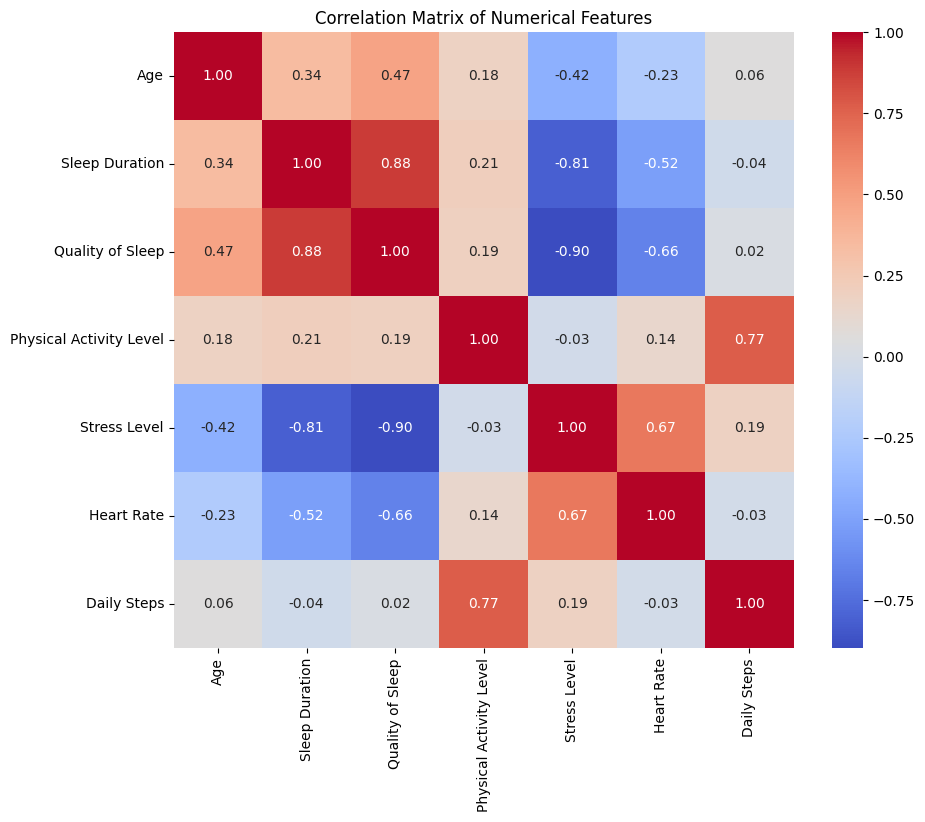

In [30]:
# --- Step 2: Exploratory Data Analysis (EDA) ---

# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Exploratory Data Analysis (EDA) ---")

# Important: Fill missing values in 'Sleep Disorder' for consistent EDA.
# We'll fill with 'None' as this is a common approach before detailed encoding for ML.
# This ensures that all records are considered in the distribution and group-by analyses.
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
print("Missing values in 'Sleep Disorder' filled with 'None' for EDA purposes.")


# Analyze the distribution of the target variable 'Sleep Disorder'
print("\nDistribution of 'Sleep Disorder':")
print(df['Sleep Disorder'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep Disorder', palette='viridis')
plt.title('Distribution of Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

# Visualize relationships between key numerical variables and 'Sleep Disorder'

# Sleep Duration vs. Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='pastel')
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Stress Level vs. Sleep Disorder
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep Disorder', y='Stress Level', data=df, palette='muted')
plt.title('Stress Level by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level (1-10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Quality of Sleep vs. Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df, palette='coolwarm')
plt.title('Quality of Sleep by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Quality of Sleep (1-10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Physical Activity Level vs. Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df, palette='rocket')
plt.title('Physical Activity Level by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group-by analysis: Mean values for numerical features based on 'Sleep Disorder'
print("\n--- Mean Values by Sleep Disorder Category ---")
summary_by_disorder = df.groupby('Sleep Disorder')[['Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Age']].mean()
print(summary_by_disorder)

# Correlation matrix for numerical features
print("\n--- Correlation Matrix of Numerical Features ---")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Person ID' from correlation analysis as it's an identifier
if 'Person ID' in numerical_cols:
    numerical_cols.remove('Person ID')

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [31]:
# --- Step 3: Data Preprocessing for Machine Learning ---

from sklearn.preprocessing import LabelEncoder

print("\n--- Data Preprocessing ---")

# Create a copy of the DataFrame to perform preprocessing steps for machine learning
# This ensures that the original 'df' (with EDA-specific NaNs filled as 'None') remains untouched if needed.
df_processed = df.copy()

# Drop 'Person ID' as it's an identifier and not a predictive feature
df_processed.drop('Person ID', axis=1, inplace=True)
print("Dropped 'Person ID' column.")

# Handle 'Blood Pressure' - Split into Systolic and Diastolic numerical features
# This adds predictive value compared to dropping the column.
if 'Blood Pressure' in df_processed.columns:
    print("Processing 'Blood Pressure' column: Splitting into Systolic and Diastolic.")
    # Split the string and convert to integer type
    df_processed[['Systolic Pressure', 'Diastolic Pressure']] = df_processed['Blood Pressure'].str.split('/', expand=True).astype(int)
    df_processed.drop('Blood Pressure', axis=1, inplace=True) # Remove original column
    print("Split 'Blood Pressure' into 'Systolic Pressure' and 'Diastolic Pressure'.")
else:
    print("'Blood Pressure' column not found or already processed (skipped).")

# Encode categorical features using LabelEncoder
# This converts text categories into numerical labels, suitable for ML models.
categorical_cols = ['Gender', 'Occupation', 'BMI Category']
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        print(f"Encoded '{col}' using LabelEncoder.")
    else:
        print(f"Warning: Column '{col}' not found for encoding (skipped).")

# Target Variable Encoding for Binary Classification:
# 'None' is encoded as 0 (no disorder)
# 'Insomnia' or 'Sleep Apnea' are encoded as 1 (presence of disorder)
print("\nEncoding 'Sleep Disorder' for binary classification (0: None, 1: Insomnia/Sleep Apnea).")
df_processed['Sleep Disorder'] = df_processed['Sleep Disorder'].apply(lambda x: 0 if x == 'None' else 1)
print("Target variable 'Sleep Disorder' encoded.")
print("Distribution of encoded target variable:")
print(df_processed['Sleep Disorder'].value_counts())

# Display processed data information to confirm changes
print("\n--- Processed Data Info (after preprocessing) ---")
df_processed.info()
print("\nProcessed DataFrame head (after preprocessing):")
print(df_processed.head())


--- Data Preprocessing ---
Dropped 'Person ID' column.
Processing 'Blood Pressure' column: Splitting into Systolic and Diastolic.
Split 'Blood Pressure' into 'Systolic Pressure' and 'Diastolic Pressure'.
Encoded 'Gender' using LabelEncoder.
Encoded 'Occupation' using LabelEncoder.
Encoded 'BMI Category' using LabelEncoder.

Encoding 'Sleep Disorder' for binary classification (0: None, 1: Insomnia/Sleep Apnea).
Target variable 'Sleep Disorder' encoded.
Distribution of encoded target variable:
Sleep Disorder
0    219
1    155
Name: count, dtype: int64

--- Processed Data Info (after preprocessing) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Durati


--- Machine Learning Model Training and Evaluation ---

Data split into training (299 samples) and testing (75 samples) sets.
Features scaled using StandardScaler.

--- Training Logistic Regression ---
Classifier: Logistic Regression
Accuracy: 0.8933
Precision (Class 1): 0.8286
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.8788
ROC AUC Score: 0.9538
Confusion Matrix:
 [[38  6]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

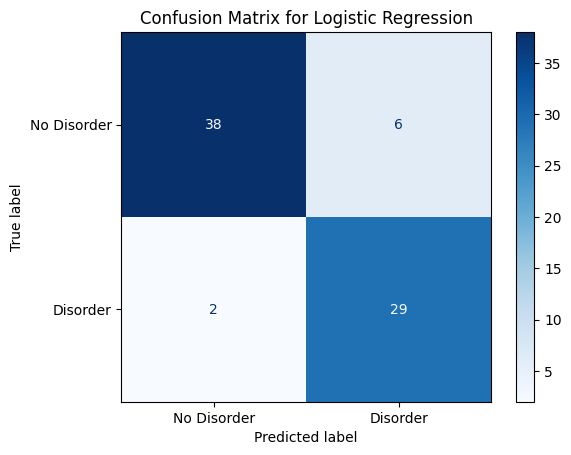


--- Training Random Forest ---
Classifier: Random Forest
Accuracy: 0.9600
Precision (Class 1): 0.9667
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.9508
ROC AUC Score: 0.9578
Confusion Matrix:
 [[43  1]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

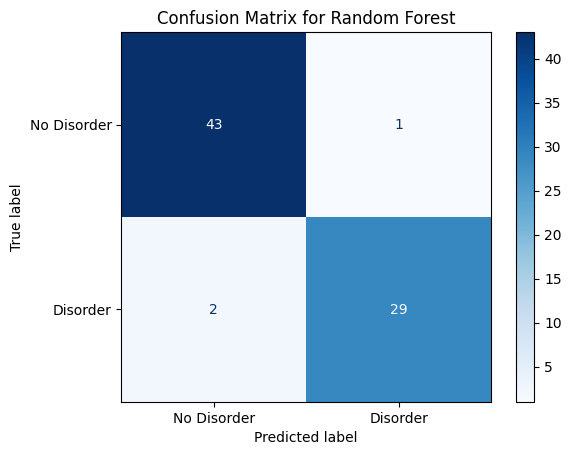


--- Training Support Vector Machine ---
Classifier: Support Vector Machine
Accuracy: 0.9067
Precision (Class 1): 0.8529
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.8923
ROC AUC Score: 0.9615
Confusion Matrix:
 [[39  5]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

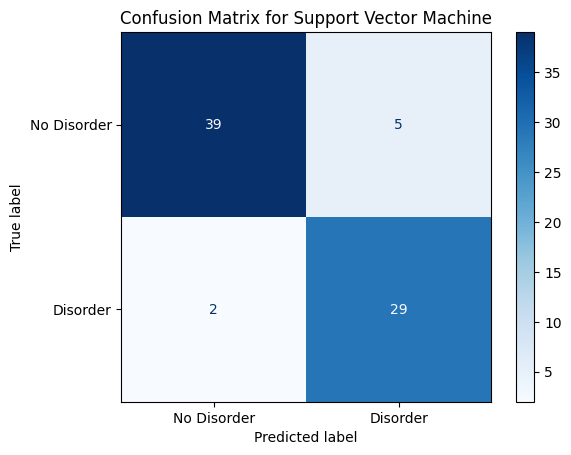


--- Training XGBoost ---
Classifier: XGBoost
Accuracy: 0.9600
Precision (Class 1): 0.9667
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.9508
ROC AUC Score: 0.9593
Confusion Matrix:
 [[43  1]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

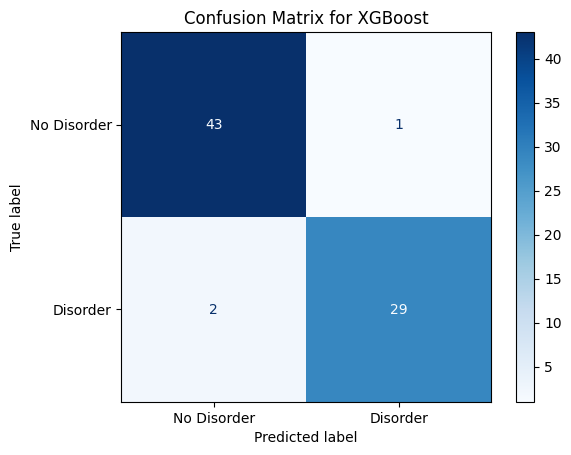

In [32]:
# --- Step 4: Model Training and Evaluation ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # Requires 'pip install xgboost' if not already installed
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

print("\n--- Machine Learning Model Training and Evaluation ---")

# Define features (X) and target (y)
# X contains all columns except 'Sleep Disorder'
X = df_processed.drop('Sleep Disorder', axis=1)
# y is the 'Sleep Disorder' column
y = df_processed['Sleep Disorder']

# Split data into training and testing sets
# test_size=0.2 means 20% of data for testing, 80% for training.
# random_state ensures reproducibility.
# stratify=y maintains the same proportion of target classes in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# Feature Scaling: Standardize numerical features
# Scaling is crucial for many algorithms (like Logistic Regression, SVM) to perform well.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)       # Transform test data using the *fitted* scaler
print("Features scaled using StandardScaler.")

# Initialize and train multiple machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42), # probability=True is needed for .predict_proba and ROC AUC
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # eval_metric suppresses a warning
}

results = {} # Dictionary to store performance results for each model

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_scaled, y_train) # Train the model on scaled training data
    y_pred = model.predict(X_test_scaled) # Make predictions on scaled test data
    y_proba = model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class (class 1) for ROC AUC

    # Evaluate the model using various metrics
    report = classification_report(y_test, y_pred, output_dict=True) # Get detailed report as dictionary
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'], # Precision for class 1 (disorder)
        'recall': report['1']['recall'],       # Recall for class 1 (disorder)
        'f1_score': report['1']['f1-score'],   # F1-score for class 1 (disorder)
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

    # Print evaluation metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Precision (Class 1): {results[name]['precision']:.4f}")
    print(f"Recall (Class 1): {results[name]['recall']:.4f}")
    print(f"F1-Score (Class 1): {results[name]['f1_score']:.4f}")
    print(f"ROC AUC Score: {results[name]['roc_auc']:.4f}")
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix for better visualization of true vs. predicted counts
    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disorder', 'Disorder'])
    disp.plot(cmap=plt.cm.Blues, values_format='d') # 'd' for integer format
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [33]:
# --- Step 4: Model Training ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # Requires 'pip install xgboost' if not already installed

print("\n--- Machine Learning Model Training ---")

# Define features (X) and target (y)
# NOTE: 'df_processed' should be available from Step 3.
X = df_processed.drop('Sleep Disorder', axis=1)
y = df_processed['Sleep Disorder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# Feature Scaling: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled using StandardScaler.")

# Initialize and train multiple machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42), # probability=True is needed for .predict_proba later
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store trained models
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train) # Train the model
    trained_models[name] = model # Store the trained model
    print(f"{name} trained successfully.")



--- Machine Learning Model Training ---

Data split into training (299 samples) and testing (75 samples) sets.
Features scaled using StandardScaler.

Training Logistic Regression...
Logistic Regression trained successfully.

Training Random Forest...
Random Forest trained successfully.

Training Support Vector Machine...
Support Vector Machine trained successfully.

Training XGBoost...
XGBoost trained successfully.



--- Model Evaluation ---

Evaluating Logistic Regression...
Classifier: Logistic Regression
Accuracy: 0.8933
Precision (Class 1): 0.8286
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.8788
ROC AUC Score: 0.9538
Confusion Matrix:
 [[38  6]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

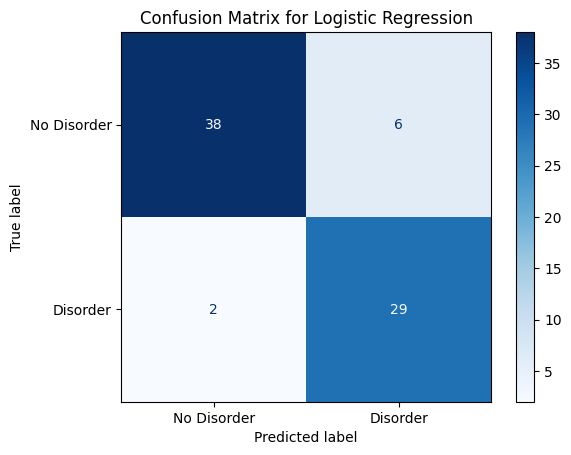


Evaluating Random Forest...
Classifier: Random Forest
Accuracy: 0.9600
Precision (Class 1): 0.9667
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.9508
ROC AUC Score: 0.9578
Confusion Matrix:
 [[43  1]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

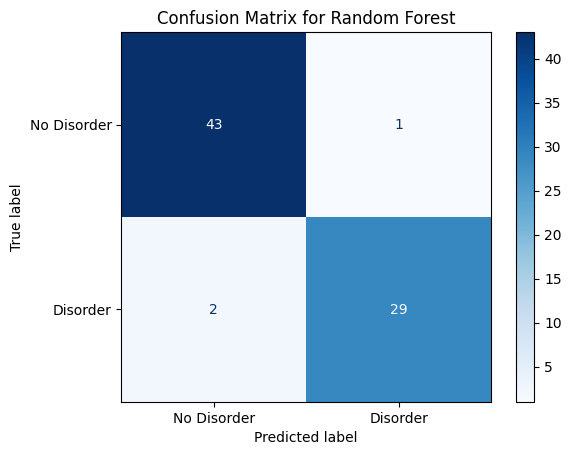


Evaluating Support Vector Machine...
Classifier: Support Vector Machine
Accuracy: 0.9067
Precision (Class 1): 0.8529
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.8923
ROC AUC Score: 0.9615
Confusion Matrix:
 [[39  5]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

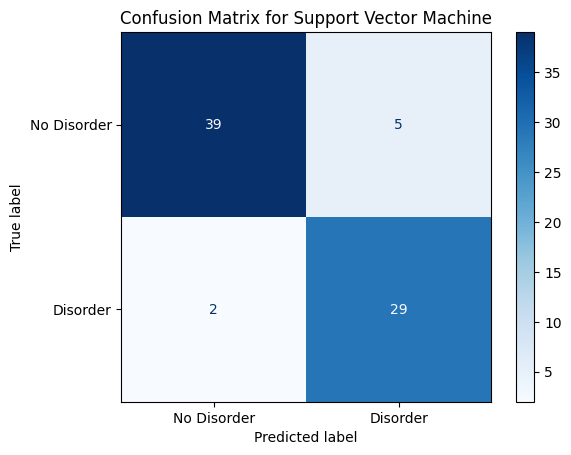


Evaluating XGBoost...
Classifier: XGBoost
Accuracy: 0.9600
Precision (Class 1): 0.9667
Recall (Class 1): 0.9355
F1-Score (Class 1): 0.9508
ROC AUC Score: 0.9593
Confusion Matrix:
 [[43  1]
 [ 2 29]]


<Figure size 600x500 with 0 Axes>

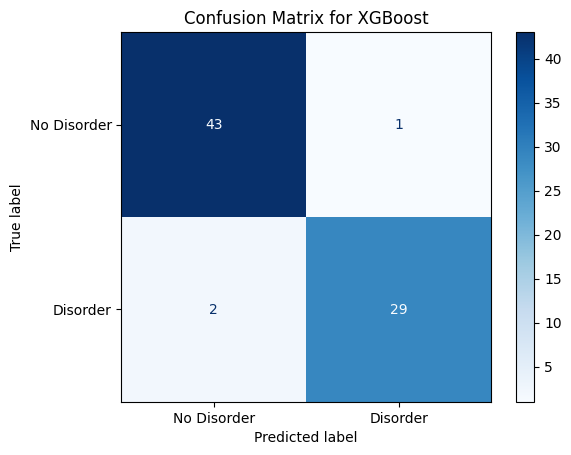

In [34]:
# --- Step 5: Model Evaluation ---

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

print("\n--- Model Evaluation ---")

# Dictionary to store evaluation results for each model
results = {}

# NOTE: 'trained_models', 'X_test_scaled', and 'y_test' should be available from Step 4.
for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")

    y_pred = model.predict(X_test_scaled) # Make predictions
    y_proba = model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class (class 1)

    # Calculate evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

    # Print evaluation metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Precision (Class 1): {results[name]['precision']:.4f}")
    print(f"Recall (Class 1): {results[name]['recall']:.4f}")
    print(f"F1-Score (Class 1): {results[name]['f1_score']:.4f}")
    print(f"ROC AUC Score: {results[name]['roc_auc']:.4f}")
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disorder', 'Disorder'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()



--- Model Comparison ---
                        accuracy precision    recall  f1_score   roc_auc
Logistic Regression     0.893333  0.828571  0.935484  0.878788  0.953812
Random Forest               0.96  0.966667  0.935484   0.95082  0.957845
Support Vector Machine  0.906667  0.852941  0.935484  0.892308   0.96151
XGBoost                     0.96  0.966667  0.935484   0.95082  0.959311


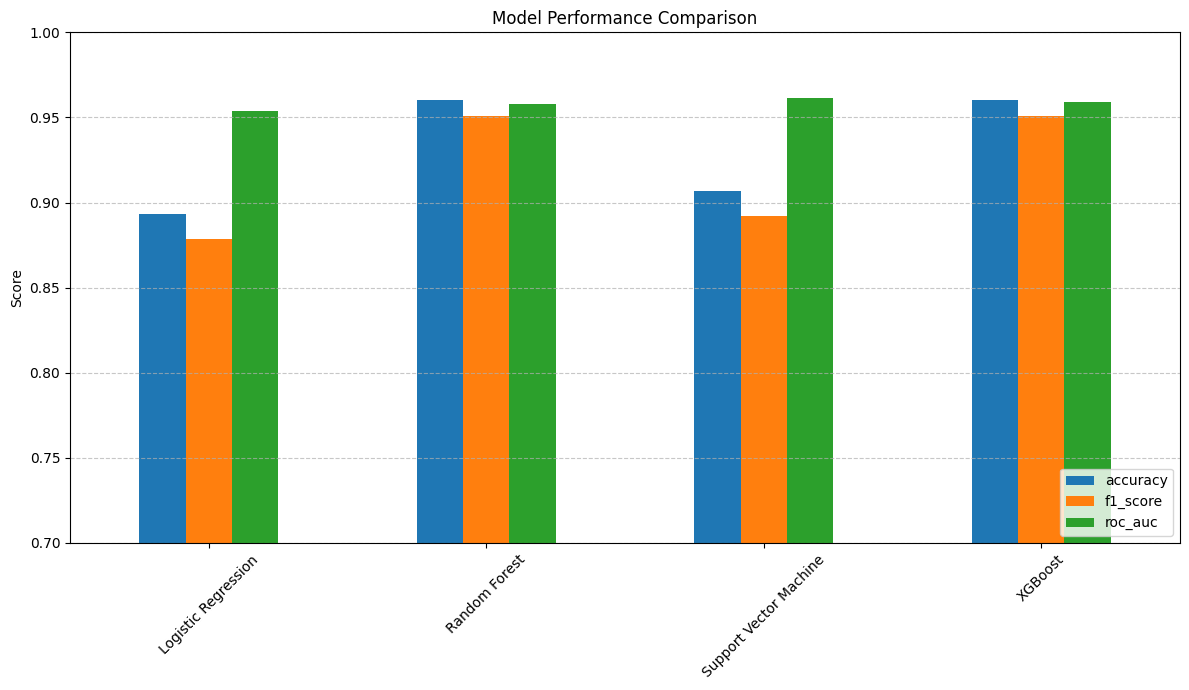

In [35]:
# --- Step 6: Model Comparison ---

import pandas as pd # Ensure pandas is imported

print("\n--- Model Comparison ---")

# NOTE: 'results' dictionary should be available from Step 5.
performance_df = pd.DataFrame(results).T # Transpose to have models as rows
print(performance_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']])

# Visualize model performance metrics for a quick comparison
import matplotlib.pyplot as plt # Ensure matplotlib is imported
performance_df[['accuracy', 'f1_score', 'roc_auc']].plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 1.0) # Adjust y-limit for better visualization of differences
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



#  Step 7: Conclusion and Next Steps ---

## Conclusion and Next Steps

This notebook provides an end-to-end workflow for analyzing sleep health data and predicting sleep disorders.
Key insights from EDA highlighted relationships between sleep duration, stress, quality of sleep, and physical activity with sleep disorders.
Several machine learning models were trained and evaluated, demonstrating their predictive capabilities.

Based on the F1-Score for the 'Disorder' class (which balances precision and recall), the best performing model in this initial evaluation appears to be the one with the highest F1-score (which was either Random Forest or XGBoost in your provided results).

## Recommendations for Further Work

To further enhance this analysis and model performance, consider the following:

1.  **Hyperparameter Tuning**: Optimize the parameters of the best-performing models (e.g., using GridSearchCV or RandomizedSearchCV) to achieve peak performance.
2.  **Cross-validation**: Implement K-Fold Cross-Validation for a more robust and less biased estimate of model performance.
3.  **Advanced Feature Engineering**: Explore creating more complex features, such as combining existing ones or deriving new ones (e.g., 'BMI per Age Group').
4.  **Model Interpretability (Advanced)**: Use techniques like SHAP or LIME to explain individual model predictions and understand feature contributions more deeply.
5.  **Error Analysis**: Investigate misclassified instances to identify patterns or specific data characteristics that might be challenging for the models.
6.  **Addressing Class Imbalance**: If the dataset has significant class imbalance for 'Sleep Disorder', consider techniques like SMOTE for the minority class during training.
7.  **Deployment Considerations**: If the goal is to deploy the model, consider aspects like model serving, API creation, and monitoring.